O arquivo foi preenchido juntamente com o **professor Fernando Amaral do Curso Formação Cientista de Dados da Udemy**. Além disso, adicionei comentários acima de cada código para tornar a estrutura mais compreensível e facilitar a revisão do conteúdo. A definição de cada estrutura foi aprimorada com o auxílio do chat GPT, que ofereceu esclarecimentos ao longo do processo. Além disso, foram incorporados ensinamentos fornecidos pelo professor Fernando Amaral.

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

#### Importando Dados:
Nessa parte do código, um arquivo CSV chamado "Churn.csv" é importado e lido em um DataFrame do Pandas. 
O arquivo é lido usando a função pd.read_csv, onde pd é um alias para o módulo Pandas. 
**O parâmetro sep=";** " é usado para especificar que o separador entre os valores no arquivo CSV é o ponto e vírgula (;).
Ao importar dados de um arquivo CSV (Comma Separated Values), é necessário informar à função pd.read_csv() qual é o caractere ou sequência de caracteres usado para separar os valores em cada linha do arquivo. Por padrão, a função pd.read_csv() assume que o separador é uma vírgula (,), pois a extensão do arquivo CSV sugere "Comma" Separated Values. 
**No entanto, em alguns casos, os arquivos CSV podem usar outros caracteres como separadores, como ponto e vírgula (;), tabulação (\t), espaço em branco, entre outros.**

#### Visualizar
O método head() é chamado no DataFrame dataset. Esse método é usado para visualizar as primeiras 
linhas do DataFrame, por padrão, as cinco primeiras linhas

In [2]:
#importar dados: 
dataset = pd.read_csv("Churn.csv", sep=";")
#visulizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


A propriedade **shape** é usada para obter as dimensões de um conjunto de dados. No exemplo abaixo há 999 linhas e 12 colunas.
A propriedade shape não conta o cabeçalho do DataFrame ao retornar o número de linhas e colunas.

In [3]:
#tamanho
dataset.shape

(999, 12)

Precisamos renomear as colunas. O **dataset** é o nome do DataFrame que será modificado, atribuímos este nome anteriormente;**Columns:** É uma propriedade do DataFrame que retorna uma lista com os nomes das colunas atuais. Ao atribuir valores a essa propriedade, podemos renomear as colunas. É importante que o número de elementos na lista seja o mesmo número de colunas já existentes no DataFrame, caso contrário haverá erro na execução do código.
**Importante notar que a atribuição dataset.columns = [...] não altera o arquivo original (ou DataFrame original) em si**. Ela apenas renomeia temporariamente as colunas durante a sessão atual do Python. Para realizar a modificação diretamente no DataFrame original, você pode utilizar o parâmetro **inplace=True e o método rename**.O método rename permite fornecer um dicionário em que as chaves são os nomes antigos das colunas e os valores são os novos nomes que você deseja atribuir a elas.

dataset.rename(columns={"X0": "Id", "X1": "Score", "X2": "Estado", "X3": "Genero", "X4": "Idade",
                        "X4.1": "Patrimonio", "X6": "Saldo", "X7": "Produtos", "X8": "TemCartCredito",
                        "X9": "Ativo", "X10": "Salario", "X11": "Saiu"}, inplace=True)

In [4]:
#primeiro problema é dar nomes as colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario", "Saiu"]

In [5]:
#visulizar
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Verificar a ocorrência de valores por estado
Nesse código, estamos utilizando o método groupby() do Pandas para agrupar os dados do DataFrame **dataset** pela coluna 'Estado'. O método **groupby()** cria grupos de linhas com base nos valores únicos presentes na coluna 'Estado'. Em seguida, aplicamos a função **size()** para contar o número de ocorrências em cada grupo.
O resultado é uma série com o número de ocorrências para cada valor único na coluna 'Estado'.
**Este comando é aplicado a uma nova variável chamada de 'agrupado' responsável por armazenar o resultado do agrupamento feito pelo método groupby()**

In [6]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

Neste ponto queremos criar um gráfico de barras com base nos dados da variável 'agrupado'. **Plot** é um método do Pandas que permite criar gráficos a partir dos dados de uma série ou DataFrame, se você utilizar apenas plot sem especificação, o Pandas criará um gráfico padrão, que geralmente é um gráfico de linhas, desta forma, cada valor único da coluna 'Estado' será representado no eixo x, e o valor associado (número de ocorrências) será representado no eixo y. O argumento **bar** passado para o método plot indica que queremos criar um gráfico de barras com base nos dados da série 'agrupado'.**color='orange** É um argumento opcional que define a cor das barras no gráfico. Neste caso, estamos definindo a cor das barras como laranja ('orange'). Você pode personalizar as cores como desejar.

<AxesSubplot:xlabel='Estado'>

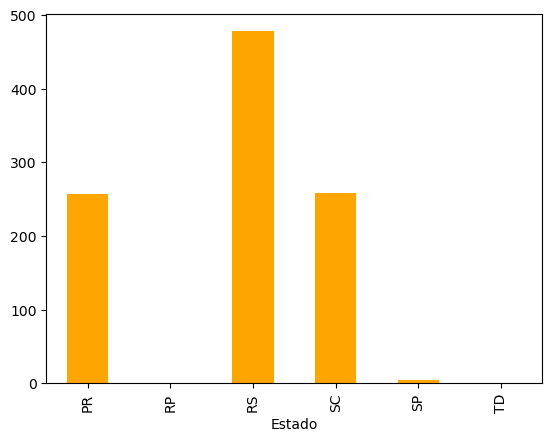

In [7]:
agrupado.plot.bar(color = 'orange')

In [8]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

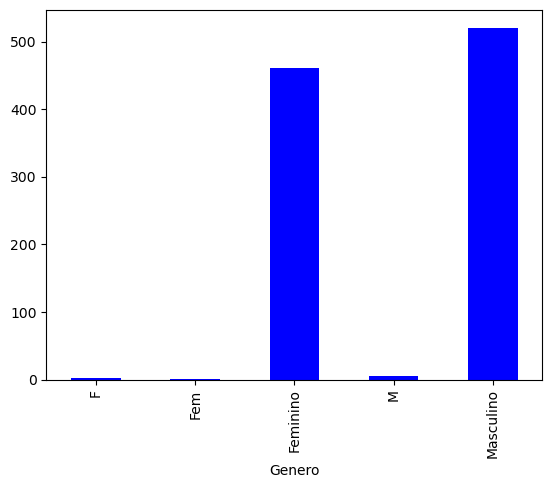

In [9]:
agrupado.plot.bar(color = 'blue')

**dataset['Score']:** Acessa a coluna 'Score' do DataFrame dataset. A notação com colchetes é usada para acessar uma coluna específica de um DataFrame. Nesse caso, estamos selecionando a coluna 'Score', antiga coluna 'xi', do DataFrame dataset.

**describe()** é um método do Pandas que é aplicado a uma série (coluna) de um DataFrame. Ele fornece um resumo estatístico dos dados da coluna selecionada. Quando chamamos **dataset['Score'].describe()**, o método describe() é aplicado à coluna 'Score', fornecendo as seguintes estatísticas descritivas:
**count**: O número de valores não ausentes na coluna.
**mean**: A média dos valores na coluna.
**std**: O desvio padrão dos valores na coluna.
**min**: O valor mínimo na coluna.
**25%**: O primeiro quartil (25º percentil) dos valores na coluna.
**50%**: A mediana (50º percentil) dos valores na coluna.
**75%**: O terceiro quartil (75º percentil) dos valores na coluna.
**max**: O valor máximo na coluna.

In [10]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Na aula é passado o seguinte código **srn.boxplot(dataset['Score']).set_title('Score')** para gerar um diagrama de caixa, demonstrando visualmente a distribuição dos dados da coluna 'Score'. Porém, como as aulas são de 2020, ao executar o código dá um warning ao ser utilizado, isto ocorre porque está usando o método boxplot do Seaborn sem especificar o eixo x adequadamente. Consegui corrigir o código usando a função **sns.boxplot()** do seaborn para criar o diagrama de caixa. 
**x=dataset['Score']**: Especifica a coluna do DataFrame que será usada como eixo x no boxplot. Neste caso, escolhemos a coluna 'Score' do DataFrame dataset. Essa é a coluna que contém os dados que queremos visualizar no boxplot.**color='orange'**: Especifica a cor que será utilizada para colorir os boxes do boxplot. Neste caso, escolhemos a cor laranja. **plt.title('Score')**: Define o título do gráfico como "Score".

Text(0.5, 1.0, 'Score')

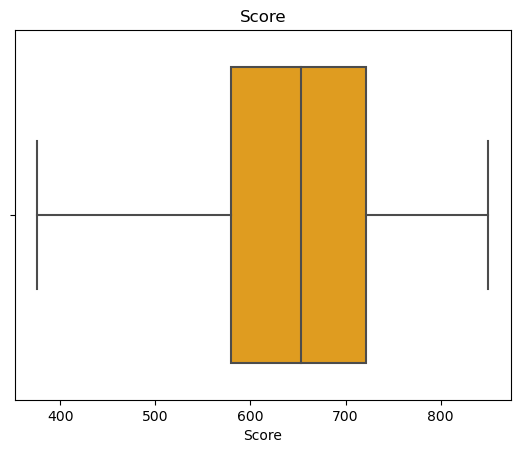

In [11]:
srn.boxplot(x=dataset['Score'],color='orange').set_title('Score')

Também há Warning ao tentar gerar um histograma dos dados da coluna 'Score.' O código passado srn.distplot(dataset['Score']).set_title('Score'), estó obsoleto, o gráfico distplot está sendo descontinuado. Desta forma,corrigi da seguinte maneira. **dataset['Score']** Especifica a coluna do DataFrame que será usada para criar o histograma. Neste caso, usamos a coluna 'Score' do DataFrame dataset. **stat='density'**: Especifica o tipo de estatística a ser calculada para o eixo y. Neste caso, definimos como "density" (densidade) para mostrar a densidade de probabilidade em vez da frequência absoluta no eixo y. Isso permite que o histograma esteja normalizado de modo que a área total sob a curva seja igual a 1.**kde=True**: Especifica se você deseja traçar a estimativa de densidade de kernel (KDE) juntamente com o histograma. O KDE é uma forma suavizada de representar a distribuição de dados em um gráfico, semelhante a um histograma, mas com uma aparência mais suave e contínua.Ao definir kde=True, o KDE será traçado. **set_title('Score')**: Define o título do gráfico como "Score". Aqui, estamos usando a função .set_title() para personalizar o título do gráfico.

Text(0.5, 1.0, 'Score')

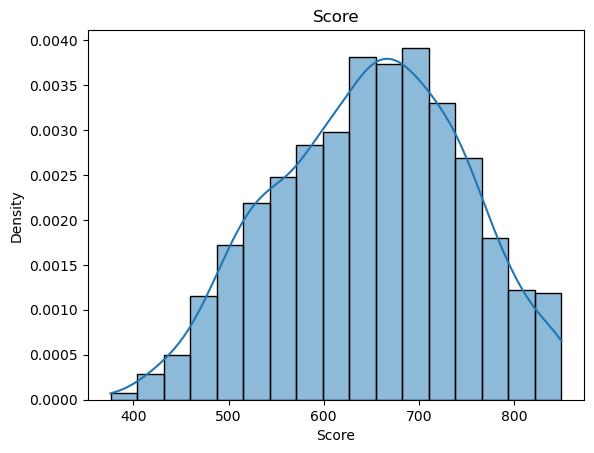

In [12]:
srn.histplot(dataset['Score'],stat='density',kde=True).set_title('Score')

In [13]:
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

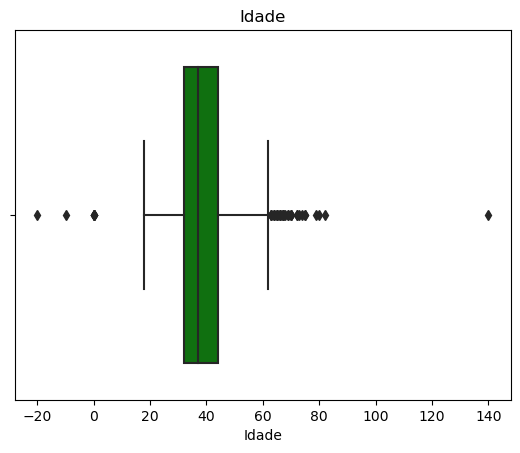

In [14]:
'''O código passado também estava obsoleto: srn.boxplot(dataset['Idade']).set_title('Idade'). 
Foi atualizado conforme as definições anteriores.'''

srn.boxplot(x=dataset['Idade'],color='green').set_title('Idade')

Text(0.5, 1.0, 'Idade')

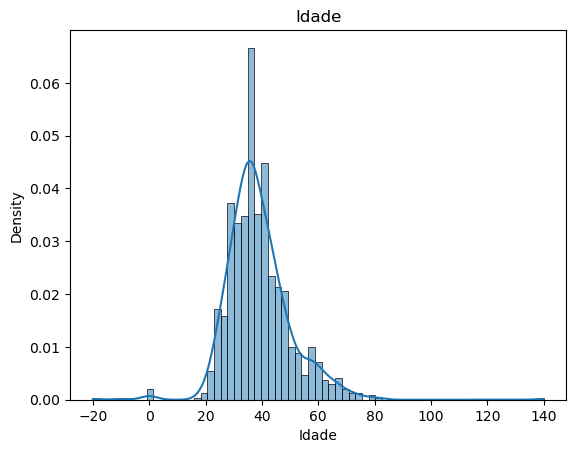

In [15]:
'''O código passado também estava obsoleto: srn.distplot(dataset['Idade']).set_title('Idade'). 
Foi atualizado conforme as definições anteriores.'''

srn.histplot(dataset['Idade'],stat='density',kde=True).set_title('Idade')

In [16]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

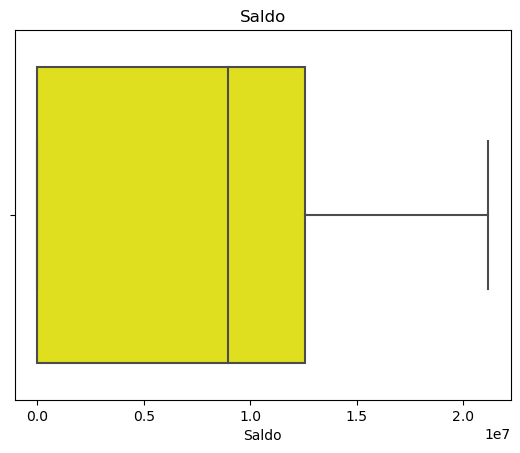

In [17]:
'''O código passado também estava obsoleto: srn.boxplot(dataset['Saldo']).set_title('Saldo'). 
Foi atualizado conforme as definições anteriores.'''

srn.boxplot(x=dataset['Saldo'],color='yellow').set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

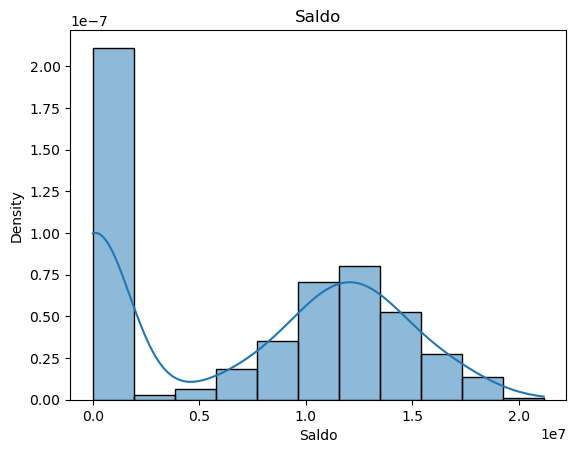

In [18]:
'''O código passado também estava obsoleto: srn.distplot(dataset['Saldo']).set_title('Saldo'). 
Foi atualizado conforme as definições anteriores.'''

srn.histplot(dataset['Saldo'],stat='density',kde=True).set_title('Saldo')

In [19]:
#salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

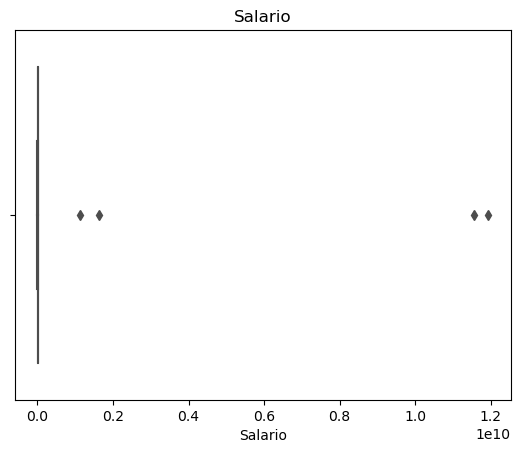

In [20]:
'''O código passado também estava obsoleto: srn.boxplot(dataset['Salario']).set_title('Salario'). 
Foi atualizado conforme as definições anteriores.'''

srn.boxplot(x=dataset['Salario'],color='gray').set_title('Salario')

Text(0.5, 1.0, 'Salario')

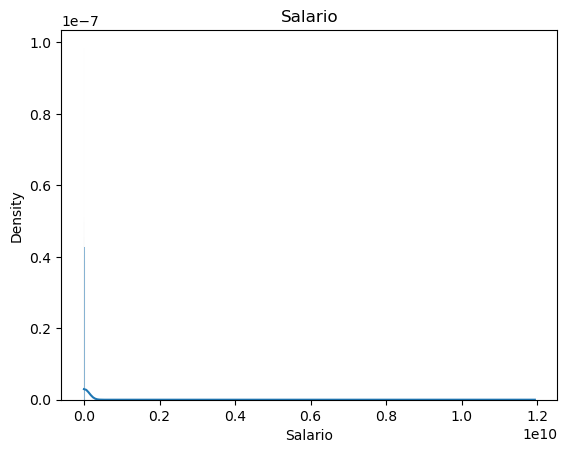

In [21]:
'''O código passado também estava obsoleto: srn.distplot(dataset['Salario']).set_title('Salario'). 
Foi atualizado conforme as definições anteriores.'''

srn.histplot(dataset['Salario'],stat='density',kde=True).set_title('Salario')

O método **isnull()** é usado para verificar se cada elemento do DataFrame é nulo ou não. Ele retorna um DataFrame com o mesmo formato do DataFrame original, mas com valores booleanos (True/False) indicando se cada elemento é nulo ou não. O método **sum()** é aplicado ao DataFrame resultante da verificação de valores nulos, e ele retorna a soma de valores True para cada coluna. 

In [22]:
'''Verificar valores ausentes, NAs 'Not Available/Not Applicable' '''
#contamos valores NAN
#genero e salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [23]:
#salarios
#remover nas e substiutir pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Escolhemos a mediana e não a média para substituir os valores nulos, uma vez que, os **Outliers** tornam a média não representativa dos dados. Há um problema no código passado em aula: mediana = **sts.median(dataset['Salario'])**, que retorna um valor de mediana: 70518.0, o valor diverge da mediana calculada pelo Excel, **uma explicação para este erro** é que a biblioteca statistics considera os valores nulos presentes na coluna 'Salario'. A função median() da biblioteca statistics calcula a mediana normalmente, incluindo os valores nulos no cálculo. Isso significa que os valores nulos serão considerados para determinar o valor central quando os dados estiverem ordenados. Já se a coluna 'Salario' não contiver nenhum valor numérico (por exemplo, se todos os valores forem nulos), a função median() retornará um erro do tipo statistics.StatisticsError, pois não é possível calcular a mediana sem valores numéricos.

In [24]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

Uma forma de corrigir isto é utilizar a biblioteca **pandas**, ela calcula a mediana da coluna 'Salario', ignorando os valores nulos.O método **dropna()** é usado para remover os valores nulos da coluna antes de calcular a mediana usando o método median(). Isso garante que a mediana seja calculada apenas com os valores numéricos presentes na coluna 'Salario'.

In [25]:
mediana_sem_na = dataset['Salario'].dropna().median()
mediana_sem_na

8703249.5

In [26]:
#substituir NA por mediana
dataset['Salario'].fillna(mediana_sem_na, inplace=True)

In [27]:
#Verificamos se NA não existem mais
dataset['Salario'].isnull().sum()

0

In [28]:
#Há uma falta de padronização em relação ao genêro, conforme verificado abaixo:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [29]:
#Além disto, há também valores nulos na coluna genêro:
dataset['Genero'].isnull().sum()

8

Como o genêro que mais aparece, **moda** é o masculino, iremos substituir os valores nulos pelo genêro Masculino. Usamos o **método .fillna('Masculino'** para preencher os valores ausentes na coluna 'Genero' com o valor 'Masculino'. Neste caso, todos os valores NaN(Not a Number) na coluna 'Genero' serão substituídos pelo valor 'Masculino'. Conforme já relatado, **inplace=True**: É um parâmetro opcional, quando inplace=True é usado, as alterações são aplicadas diretamente ao DataFrame original, em vez de criar uma cópia modificada. 

In [30]:
#preenche NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [31]:
#verificamos novamente NANs
dataset['Genero'].isnull().sum()

0

Para padronizar os valores M, para Masculino e Fem, F para feminino o professor aplicou o seguinte código:   
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"  
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"

Mas podemos usar a **função replace** que deixa o código mais limpo, nesta opção, estamos utilizando o **método replace()** para substituir os valores 'M' por "Masculino" e os valores 'Fem' e 'F' por "Feminino" na coluna 'Genero'. **Quando você precisa substituir vários valores diferentes por um único valor, é necessário utilizar uma lista no método replace()**.Como foi o caso de replace(['Fem', 'F']. O parâmetro inplace=True é usado para aplicar as alterações diretamente no DataFrame original. Posteriormente usamos o método **groupby()** do Pandas para agrupar os dados do DataFrame dataset pela coluna 'Genero' e, em seguida, usa o método **size()** para contar o número de ocorrências em cada grupo.

In [32]:
dataset['Genero'].replace('M', 'Masculino', inplace=True)
dataset['Genero'].replace(['Fem', 'F'], 'Feminino', inplace=True)

#Visualização do resultado
agrupar_genero = dataset.groupby(['Genero']).size()
agrupar_genero

Genero
Feminino     464
Masculino    535
dtype: int64

In [33]:
#Note que há idades que fogem de um valor plausível, como -20 e 140. 
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Precisamos gerar um intervalo válido para as idades do DataFrame, o intervalo escolhido foi entre 0 e 120. O instrutor havia passado o código:  
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]  
Uma outra maneira de encontrar estes valores é pelo **método query()**. Para mim, este código fica mais visual. O método query() é usado para selecionar as linhas do DataFrame com base em uma expressão de consulta. Neste caso, a expressão de consulta é 'Idade < 0 or Idade > 120'.A expressão diz que queremos selecionar as linhas em que o valor da coluna 'Idade' seja menor que 0 ou maior que 120.

In [34]:
dataset_idade_invalida = dataset.query('Idade < 0 or Idade > 120')
dataset_idade_invalida

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [35]:
"""Agora precisamos calcular a mediana para substituir os valores discrepantes, como não há valores nulos, 
podemos utilizar biblioteca statistics"""
mediana_idade = sts.median(dataset['Idade'])
mediana_idade

37

Agora precisamos substituir os valores discrepantes pela mediana, para isto, podemos utilizar o **o método loc[].**
O método loc[] é usado para selecionar linhas do DataFrame com base na série booleana gerada por uma condição combinada. As linhas onde a série booleana é True (ou seja, onde a idade é menor que 0 ou maior que 120) serão selecionadas.  **(dataset['Idade'] < 0) | (dataset['Idade'] > 120)**: Nesta parte, usamos o operador **|** para combinar as duas condições anteriores. Essa expressão retorna uma série booleana que é True quando a idade é menor que 0 ou maior que 120 e False caso contrário. Desta forma a variável **mediana_idade** é o valor que será atribuído às linhas selecionadas.

In [36]:
#substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana_idade

In [37]:
#verificamos se ainda existem idades fora do domínio
dataset_idade_invalida = dataset.query('Idade < 0 or Idade > 120')
dataset_idade_invalida

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Agora precisamos verificar se há dados duplicados, como o Id é um elemento único para cada dado, podemos fazer esta verificação com base no id. Utilizamos o **método duplicated** para realizar esta verificação na coluna 'Id'. Assim, o método duplicated() é aplicado ao DataFrame dataset para identificar linhas duplicadas com base nas colunas fornecidas. Neste caso, estamos verificando duplicatas na coluna 'Id'. Ao usar **keep=False** com o método duplicated(), você obtém todas as ocorrências duplicadas (incluindo a primeira e todas as demais ocorrências), isso pode ser útil quando você deseja identificar todas as linhas que contêm valores duplicados em uma coluna específica do DataFrame. Assim todos os valores duplicados são retornados.

In [38]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


Agora iremos excluir as colunas duplicadas. Podemos usar o método **drop_duplicates()**, que é um método usado para remover as linhas duplicadas com base em critérios específicos.Sobre **subset="Id"**: O argumento subset indica a coluna na qual você deseja verificar duplicatas. Neste caso, estamos verificando duplicatas na coluna 'Id. Já sobre o **keep='first'** O argumento keep controla qual ocorrência de cada duplicata será mantida. Aqui, estamos usando 'first', o que significa que apenas a primeira ocorrência de cada duplicata será mantida e as demais serão removidas. Portanto, removeremos as linhas duplicadas do DataFrame dataset, mantendo apenas a primeira ocorrência de cada duplicata com base na coluna 'Id

In [39]:
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)

#buscamos duplicados novamente
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [40]:
#Verificar estados que não fazem parte do domínio, região Sul

agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

Neste caso vamos substituir os valores que não fazem parte do domínio pela moda, neste caso o estado do RS.  
O código fornecido pelo instrutor:    
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"  
Optei por utilizar **função Replace**.

In [41]:
dataset['Estado'].replace(['RP','SP','TD'], 'RS', inplace=True)

In [42]:
#verificamos o resultado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

Conforme verificado há valores discrepantes para os dados em 'Salário', uma abordagem que podemos utilizar é considerar dois desvios padrão e os valores que estiverem além  destes dois 2 desvios padrão serão considerados **outliers**. 

In [43]:
#Calculo do desvio padrão aplicado a coluna Salario.
desvio = sts.stdev(dataset['Salario'])
desvio

528985400.63502765

Agora iremos verificar apenas as linhas onde o salário é maior ou igual a 2 vezes o valor do desvio padrão. O código fornecido pelo professor era:
dataset.loc[dataset['Salario'] >=  2 * desv ]   
Preferi usar o **método query**. Note que usamos @desvio para fazer referência à variável desvio, que contém o valor do desvio padrão calculado anteriormente 

In [44]:
dataset_filtrado = dataset.query('Salario >= 2 * @desvio')
dataset_filtrado

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


Nos iremos substituir os valores pela mediana, conforme já mencionado, há duas maneiras de calcular a mediana pela biblioteca **statistics** que inclui valores nulos, ou pela biblioteca **pandas**, como anteriormente já tratamos os valores nulos, agora poderemos utilizar a biblioteca statistics.

In [45]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

8703249.5

Agora podemos substituir os outliers pela mediana, para isto, podemos utilizar o **o método loc[].**, já explicado anteriormente.

In [48]:
dataset.loc[dataset['Salario'] >=  2 * desvio, 'Salario'] = mediana

#Verificamos novamente se há ainda valores fora do intervalo de 2 desvios padrão
dataset.loc[dataset['Salario'] >=  2 * desvio ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [49]:
#Verificando novamente a estrutura dos dados
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [50]:
#Uma linha duplicada foi removida
dataset.shape

(998, 12)